# Explanatory Data Analysis on TV Shows

In this notebook I will do an Exploratory Data Analysis on TV Shows Dataset. I will use statistics concepts like grouped data and distributions and I will realize plots from data.

## Import

In [1]:
## necessary import

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Load data and first overview


In [2]:
## load dataset
data = pd.read_csv("data_TV.csv")

In [3]:
## print first 5 line of dataset
data.head()

,first_air_date,origin_country,original_language,name,popularity,vote_average,vote_count,overview
0,2021-09-03,US,en,The D'Amelio Show,30.104,9.0,3071,From relative obscurity and a seemingly normal...
1,2008-01-20,US,en,Breaking Bad,468.253,8.8,10131,"When Walter White, a New Mexico chemistry teac..."
2,2021-11-06,US,en,Arcane,95.667,8.7,2615,Amid the stark discord of twin cities Piltover...
3,2013-12-02,US,en,Rick and Morty,1511.996,8.7,7220,Rick is a mentally-unbalanced but scientifical...
4,2022-04-14,US,en,The Kardashians,195.038,8.7,1627,The family you know and love is here with a br...


In [4]:
## print shape of dataset (rowxcolumns)
data.shape

(2617, 8)

Out dataset contain 2617 rows for 8 columns. Thanks to .head() command we can figure out which information we have about data. Information are date of on air, origin country and language, name of TV Show, popularity, vote, vote count and overview. We can easly understand which kind of data we have in this columns, but we will use .info() command to be more confident.

In [5]:
## print name of columns and basic information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2617 entries, 0 to 2616
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   first_air_date     2611 non-null   object 
 1   origin_country     2617 non-null   object 
 2   original_language  2617 non-null   object 
 3   name               2617 non-null   object 
 4   popularity         2617 non-null   float64
 5   vote_average       2617 non-null   float64
 6   vote_count         2617 non-null   int64  
 7   overview           2552 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 163.7+ KB


We have 5 categorical columns (in Pandas called "object") and 3 numerical, two float and one int.
Now let's see if the dataset contains missing values. For this purpose we will use .isnull().sum() commands

In [6]:
## check missing values
data.isnull().sum()

first_air_date        6
origin_country        0
original_language     0
name                  0
popularity            0
vote_average          0
vote_count            0
overview             65
dtype: int64

We have not information about first air date on 6 dataset rows and about overview on 65 dataset rows

## Numerical Variables
Let's get started by numerical variables by printing stats values

In [7]:
## print stats values
data[["popularity","vote_average","vote_count"]].describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,2617.0,59.805976,222.409084,0.866,16.567,27.489,49.765,6684.611
vote_average,2617.0,7.692434,0.617770,0.600,7.300,7.700,8.100,9.000
vote_count,2617.0,604.823462,1223.234489,99.000,150.000,257.000,569.000,19459.000


### Boxplot

We will use a box plot to figure out distribution of our data. Boxplot show us median value (row in the center of the box), 25% and 75% bounds (the side of the box) and range with max and min values.

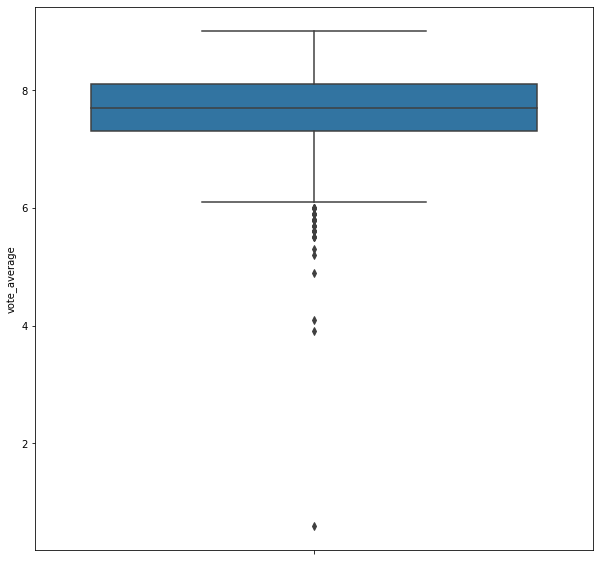

In [8]:
## boxplot
plt.figure(figsize=(10, 10))
plt.ylabel('Vote Average')
sns.boxplot(y=data["vote_average"])
plt.show()

## Categorical Variables
Now, let's get started with categorical variable. We will study count frequencies of origin_country and original_language

In [9]:
## original_country freq
data["origin_country"].value_counts()

US               1377
JP                393
GB                169
MX                148
KR                 98
                 ... 
c("US", "MX")       1
c("NC", "KR")       1
c("US", "FR")       1
JO                  1
c("US", "NL")       1
Name: origin_country, Length: 78, dtype: int64

About origin_country, we have 78 different values. We can decide to study only most rappresentative ones and skip other values.

In [10]:
## grouped data by country 
tv_shows_by_country = data.groupby('origin_country') \
                         .agg({'origin_country':'count'}) \
                         .rename(columns = {'origin_country':'number_of_shows'}) \
                         .sort_values(by = 'number_of_shows', ascending = False) \
                         .head(8) \
                         .reset_index()
tv_shows_by_country

,origin_country,number_of_shows
0,US,1377
1,JP,393
2,GB,169
3,MX,148
4,KR,98
5,CO,55
6,ES,49
7,CA,39


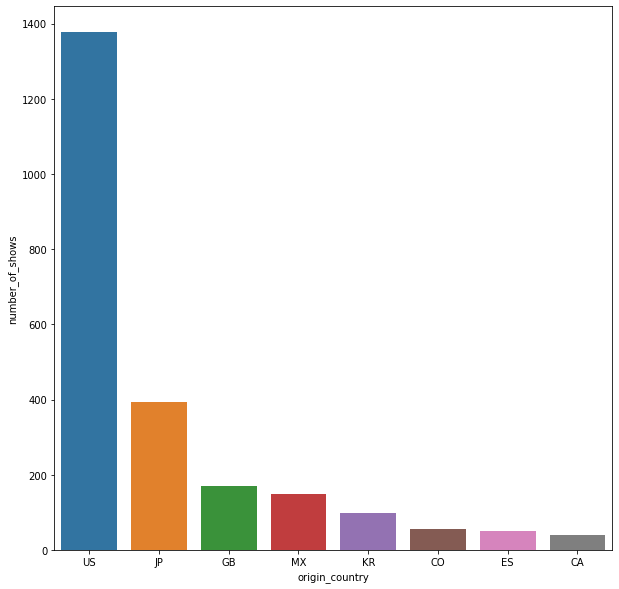

In [11]:
## barchart of number of shows by country
plt.figure(figsize=(10, 10))
plt.xlabel('Origin Country')
plt.ylabel('Number of Shows')
sns.barplot(data=tv_shows_by_country, x="origin_country", y="number_of_shows")

Same analysis for original language

In [12]:
## grouped data by country 
tv_shows_by_language = data.groupby('original_language') \
                         .agg({'original_language':'count'}) \
                         .rename(columns = {'original_language':'number_of_shows'}) \
                         .sort_values(by = 'number_of_shows', ascending = False) \
                         .head(8) \
                         .reset_index()
tv_shows_by_language

,original_language,number_of_shows
0,en,1685
1,ja,397
2,es,301
3,ko,99
4,pt,22
5,fr,20
6,tr,19
7,de,13


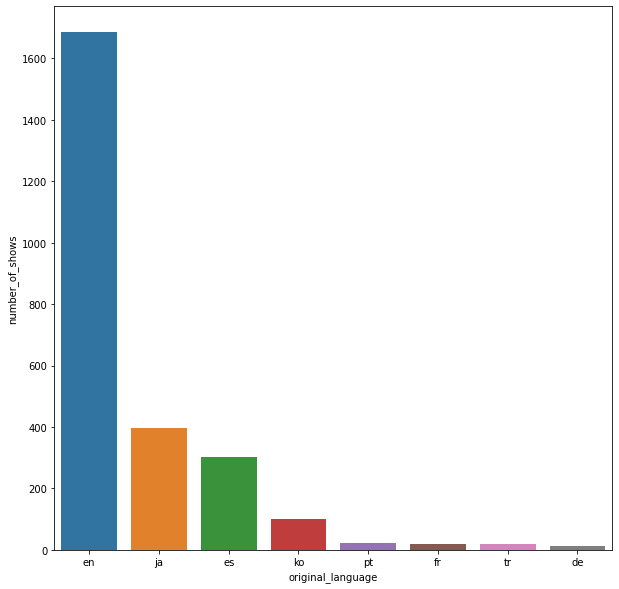

In [13]:
## barchart of language
plt.figure(figsize=(10, 10))
plt.xlabel('Language')
plt.ylabel('Number of Shows')
sns.barplot(data=tv_shows_by_language, x="original_language", y="number_of_shows")

# Question Time

After a short overview of main information about the data, let's answer the following question:

*   Which country has positive average rate?
*   Which country has negative average rate?
*   Which are best tv shows?
*   Which are worst tv shows?
*   Which is best tv shows for main country?


### Which country has positive average rate?

In [14]:
## grouped data by country 
positive_vote_rate_by_country = data.groupby('origin_country') \
                         .agg({'vote_average':'mean'}) \
                         .sort_values(by = 'vote_average', ascending = False) \
                         .head(8) \
                         .reset_index()
positive_vote_rate_by_country

,origin_country,vote_average
0,TH,8.550000
1,"c(""US"", ""NG"")",8.400000
2,"c(""US"", ""GB"", ""NZ"")",8.400000
3,"c(""NC"", ""KR"")",8.400000
4,KR,8.255102
5,JP,8.205344
6,"c(""GB"", ""CA"", ""US"")",8.200000
7,PE,8.200000


## Which country has negative average rate?

In [15]:
## grouped data by country 
negative_vote_rate_by_country = data.groupby('origin_country') \
                         .agg({'vote_average':'mean'}) \
                         .sort_values(by = 'vote_average', ascending = True) \
                         .head(8) \
                         .reset_index()
negative_vote_rate_by_country

,origin_country,vote_average
0,"c(""US"", ""NL"")",5.9
1,"c(""CA"", ""US"", ""GB"")",6.1
2,"c(""CH"", ""GB"")",6.6
3,BE,6.9
4,"c(""DE"", ""US"", ""GB"", ""IT"", ""ZA"", ""TR"")",7.1
5,"c(""ES"", ""GB"")",7.1
6,"c(""ES"", ""KN"")",7.1
7,"c(""AU"", ""GB"", ""NZ"", ""US"")",7.1


## Which are best tv shows?

In [16]:
best_tv_shows_vote = data[["name","vote_average"]] \
                   .sort_values(by = 'vote_average', ascending = False) \
                   .head(10)
                   
best_tv_shows_vote

,name,vote_average
0,The D'Amelio Show,9.0
1,Breaking Bad,8.8
50,SCHOOL-LIVE!,8.7
57,That Time I Got Reincarnated as a Slime,8.7
56,My Dress-Up Darling,8.7
55,Crash Landing on You,8.7
54,Young Royals,8.7
53,Hotel Del Luna,8.7
52,Avatar: The Last Airbender,8.7
51,Mr. Queen,8.7


## Which are worst tv shows?

In [17]:
worst_tv_shows_vote = data[["name","vote_average"]] \
                   .sort_values(by = 'vote_average', ascending = True) \
                   .head(10)
                   
worst_tv_shows_vote

,name,vote_average
2616,La Job,0.6
2615,EastEnders,3.9
2614,Teletubbies,4.1
2613,Big Brother,4.9
2612,American Idol,5.2
2611,America's Next Top Model,5.3
2610,Nightflyers,5.5
2609,The Tommyknockers,5.5
2607,Johnny Test,5.5
2608,General Hospital,5.6


## Which are best tv shows by country?

In [18]:
## get list of main countries by tv shows number
countries = tv_shows_by_country["origin_country"].unique().tolist()
countries

['US', 'JP', 'GB', 'MX', 'KR', 'CO', 'ES', 'CA']

In [19]:
## get best tv show based on vote_average by country
data_main_country = data[data["origin_country"].isin(countries)]
data_main_country.loc[data_main_country.groupby('origin_country')['vote_average'].idxmax(), ['origin_country', 'vote_average', 'name']].sort_values(by="vote_average", ascending=False)

,origin_country,vote_average,name
0,US,9.0,The D'Amelio Show
6,CA,8.7,Anne with an E
22,ES,8.7,Desafío Champions Sendokai
17,GB,8.7,I Am Not an Animal
5,JP,8.7,My Hero Academia
12,KR,8.7,Goblin
48,MX,8.7,Villainous
297,CO,8.4,Los Reyes
